In [67]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('max_colwidth', 500)

In [39]:
# dataset with human evaluation results

df = pd.read_csv("../data/webnlg2017/webnlg-human-evaluation-master/all_data_final_averaged.csv")

# defines an ID based on unique values of tripleset
df['tripleset_id'] = pd.factorize(df.mr)[0]
# redefines column mr, spliting on <br>, which separates triples, into a list of triples
df['mr'] = df.mr.str.split('<br>')
# extracts integer number of triples from triplesize, a description(ex: 5triple -> 5)
df['triplesize'] = df.triplesize.str.slice(0, 1).astype('int')

In [40]:
df.groupby('team')[['semantics', 'grammar', 'fluency']].mean().sort_values('semantics', ascending=False)

,semantics,grammar,fluency
team,,,
webnlg,2.771001,2.614574,2.584753
upf-forge,2.677877,2.469208,2.343274
tilburg-smt,2.415321,1.961584,1.814723
melbourne,2.295665,2.394021,2.270329
adapt,2.295516,2.312780,2.257623
tilburg-pipe,2.203139,2.189088,2.068236
pkuwriter,2.075037,2.385202,2.336024
tilburg-nmt,1.988714,2.160463,2.013378
baseline,1.858146,2.361136,2.248729


# Count of scores

In [42]:
adf = pd.read_csv("../data/webnlg2017/webnlg-human-evaluation-master/all_data_final_scores_anonymised.csv")

In [45]:
adf.columns

Index(['Unnamed: 0', 'X_unit_id', 'X_worker_id', 'fluency', 'grammaticality',
       'semantic_adequacy', 'mr', 'team', 'text', 'category', 'type', 'bleu',
       'meteor', 'ter', 'systemtype', 'triplesize'],
      dtype='object')

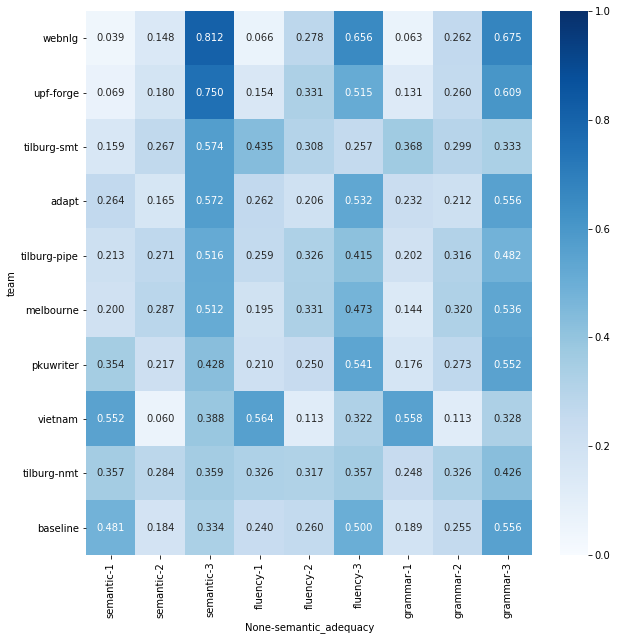

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

m = pd.concat([
    pd.crosstab(adf.team, adf.semantic_adequacy, normalize='index'),
    pd.crosstab(adf.team, adf.fluency, normalize='index'),
    pd.crosstab(adf.team, adf.grammaticality, normalize='index')
], axis=1, sort=False, keys=['semantic', 'fluency', 'grammar'])\
.sort_values(('semantic', 3), ascending=False)

sns.heatmap(m, cmap='Blues', fmt='.3f', annot=True, ax=ax, vmin=0, vmax=1)

# Teams

<img src="../img/team_models.jpg" />

In [8]:
# adding the type of model
df['model_type'] = df.team.map({'adapt': 'NMT',
                                'baseline': 'NMT',
                                'melbourne': 'NMT',
                                'pkuwriter': 'NMT',
                                'tilburg-nmt': 'NMT',
                                'tilburg-pipe': 'PIPELINE',
                                'tilburg-smt': 'SMT',
                                'upf-forge': 'PIPELINE',
                                'vietnam': 'PIPELINE',
                                'webnlg': 'REFERENCE'})

<img src="../img/seen_unseen.jpg" />

In [10]:
# adding the category type

df['category_type'] = df.category.map({'CelestialBody': 'UNSEEN',
                                       'Building': 'SEEN',
                                       'Monument': 'SEEN',
                                       'WrittenWork': 'SEEN',
                                       'University':'SEEN',
                                       'SportsTeam': 'SEEN',
                                       'MeanOfTransportation': 'UNSEEN',
                                       'Athlete': 'UNSEEN',
                                       'Politician': 'UNSEEN',
                                       'Artist': 'UNSEEN',
                                       'Astronaut': 'SEEN',
                                       'City': 'SEEN',
                                       'ComicsCharacter': 'SEEN',
                                       'Food': 'SEEN'})

# Some statistics

In [82]:
def make_heatmap(dims, metrics, aggfunc, figsize=None):
    
    n_graphs = len(metrics)
    
    if not figsize:
        
        figsize = (8, n_graphs*3)
    
    fig, axes = plt.subplots(n_graphs, 1, figsize=figsize)
    fig.tight_layout()

    g = df.groupby(dims)
    
    for metric, ax in zip(metrics, axes.ravel()):
        
        ax.set_title(metric)
        
        r = g[metric].agg(aggfunc).unstack()

        sns.heatmap(r.T, annot=True,
                         ax=ax,
                         fmt='.3f',
                         cmap='Blues')

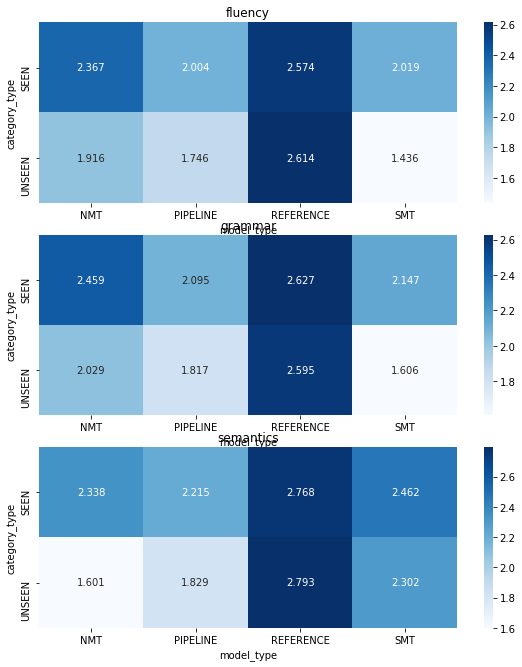

In [83]:
make_heatmap(['model_type', 'category_type'], ['fluency', 'grammar', 'semantics'], 'mean')

# Lets have a look at an example of max grade in fluency and 5 triples, with human generated

In [8]:
def sample_best(team, best_col, triplesize):
    
    # team's dataframe, with entries with triplesize
    team_df = df[(df.team == team) & (df.triplesize == triplesize)]
    # entry from above dataframe with max value of best_col
    x = team_df.nlargest(1, best_col)
    # the entry generated by humans for the same tripleset of above entry
    x_human = df[(df.team == 'webnlg') & (df.triple_id == x.triple_id.values[0])]
    
    # generates a dataframe containing both the team and human entry for the same tripleset
    return pd.concat([x, x_human]).T

## Team adapt

In [13]:
sample_best('adapt', 'fluency', 5)

,270,279
id,271,280
mr,"[AC_Hotel_Bella_Sky_Copenhagen | location | Denmark, Marriott_International | foundationPlace | Washington,_D.C., Denmark | leaderName | Lars_Løkke_Rasmussen, AC_Hotel_Bella_Sky_Copenhagen | tenant | Marriott_International, Denmark | language | Greenlandic_language]","[AC_Hotel_Bella_Sky_Copenhagen | location | Denmark, Marriott_International | foundationPlace | Washington,_D.C., Denmark | leaderName | Lars_Løkke_Rasmussen, AC_Hotel_Bella_Sky_Copenhagen | tenant | Marriott_International, Denmark | language | Greenlandic_language]"
team,adapt,webnlg
text,the leader of denmark is lars lokke rasmussen and one of the languages is greenlandic. the ac hotel bella sky is located in copenhagen and tenanted by marriott international which was founded in washington dc.,"ac hotel bella sky copenhagen is in denmark where the leader is lars lokke rasmussen and greenlandic is one of the languages spoken there . the tenant of the ac hotel bella sky copenhagen is the marriott international hotel which was founded in washington , d . c .\n"
category,Building,Building
type,seen,seen
bleu,0.409,1
meteor,0.376891,1
ter,59.77,1
systemtype,neural,human


## Team baseline

In [14]:
sample_best('baseline', 'fluency', 5)

,211,219
id,212,220
mr,"[200_Public_Square | location | Cleveland, 200_Public_Square | completionDate | 1985, Cleveland | isPartOf | Cuyahoga_County,_Ohio, Cleveland | isPartOf | Ohio, Cleveland | country | United_States]","[200_Public_Square | location | Cleveland, 200_Public_Square | completionDate | 1985, Cleveland | isPartOf | Cuyahoga_County,_Ohio, Cleveland | isPartOf | Ohio, Cleveland | country | United_States]"
team,baseline,webnlg
text,"200 public square in cleveland, cuyahoga county, ohio, united states was completed in 1985.","the 200 public square was completed in 1985 in cuyahoga county , cleveland , ohio , united states .\n"
category,Building,Building
type,seen,seen
bleu,0.218,1
meteor,0.493012,1
ter,52.381,1
systemtype,neural,human
